## SVD Image Decomposition / Compression

Implementación del algoritmo SVD para la compresión de una imagen, a medida que se reducen las dimensiones se va perdiendo información y se puede ver como afecta a la calidad de la imagen.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image

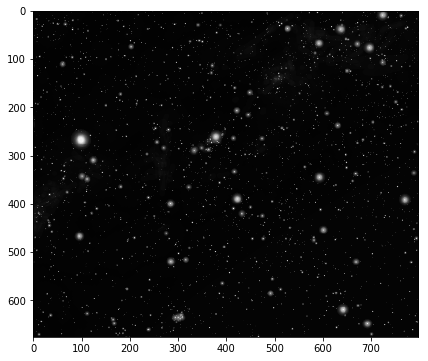

In [34]:
# obtenemos la imagen para poder trabajarla
img = Image.open('perseocasiopea.png')
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray);

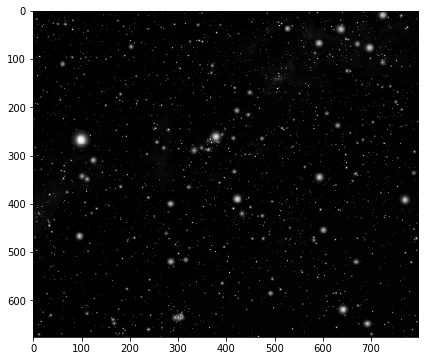

In [35]:
# llevamos la imagen a una representacion matricial con numpy 
# para poder operar
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)

# realizamos el plot a partir de la matriz (no la imagen)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');

# SVD

In [36]:
# realizamos la descomposicion en valores singulares
u, s, v = np.linalg.svd(imgmat)

In [37]:
imgmat

matrix([[ 4.,  4.,  4., ...,  6.,  5.,  5.],
        [ 4.,  4.,  4., ...,  5.,  5.,  5.],
        [ 4.,  4.,  4., ...,  5.,  5.,  5.],
        ..., 
        [ 3.,  3.,  3., ...,  4.,  4.,  4.],
        [ 3.,  3.,  3., ...,  4.,  4.,  4.],
        [ 3.,  3.,  3., ...,  4.,  4.,  4.]])

In [48]:
# verificamos los valores singulares
s

array([ 5832.30412399,  3997.68634826,  2765.04029067,  2590.53019741,
        2245.26433311,  2165.49588598,  2105.2356937 ,  1916.87837456,
        1835.83778524,  1639.6812077 ,  1526.28103044,  1459.35779216,
        1423.24505455,  1370.845664  ,  1361.16133403,  1285.71063626,
        1254.22373225,  1234.65718813,  1198.80894108,  1171.84276123,
        1151.06444309,  1127.79833691,  1119.44330755,  1100.63041226,
        1056.09455097,  1043.35499975,  1032.4602875 ,  1018.93397548,
         969.85687119,   948.88444857,   934.91314845,   928.9133814 ,
         902.2316834 ,   885.54056084,   884.57689386,   870.17403952,
         851.77112582,   843.78907137,   836.21961923,   818.7208448 ,
         815.96986973,   809.41927509,   803.02910038,   779.10631574,
         771.77602867,   764.06284111,   759.37848633,   748.49189199,
         736.85334794,   730.71725286,   717.01128427,   710.07066637,
         706.15319466,   704.03406407,   693.25375375,   691.65798059,
      

# Analisis de los valores singulares

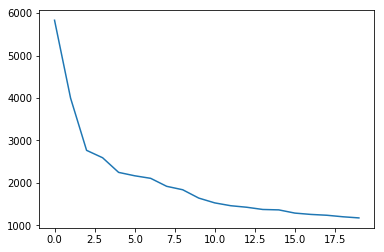

In [40]:
# realizamos un plot de los valores singulaes# realiz 
# es interesante ir reduciendo el rango para poder 
# verificar algun posible 'codo' para poder considerar 
# la dimensionalidad intrinseca de los datos
#plt.plot(s)
plt.plot(s[:20])

# Calculo de Energia

In [41]:
# calculo de energia
singular_values = s
energy_total = sum(singular_values**2)
sv_pow = singular_values**2
energy_percentage = ((sv_pow / energy_total) * 100)
print(energy_percentage)

[  2.03855398e+01   9.57765801e+00   4.58189170e+00   4.02178833e+00
   3.02118171e+00   2.81032546e+00   2.65609339e+00   2.20206943e+00
   2.01980992e+00   1.61124184e+00   1.39608193e+00   1.27633728e+00
   1.21395128e+00   1.12620906e+00   1.11035307e+00   9.90668525e-01
   9.42739969e-01   9.13554939e-01   8.61274994e-01   8.22963502e-01
   7.94037784e-01   7.62262915e-01   7.51010658e-01   7.25980423e-01
   6.68417013e-01   6.52388196e-01   6.38834855e-01   6.22205691e-01
   5.63711878e-01   5.39595786e-01   5.23822835e-01   5.17121185e-01
   4.87840711e-01   4.69957741e-01   4.68935459e-01   4.53789180e-01
   4.34798182e-01   4.26687268e-01   4.19066164e-01   4.01710873e-01
   3.99015840e-01   3.92634969e-01   3.86459919e-01   3.63777087e-01
   3.56964035e-01   3.49864638e-01   3.45587854e-01   3.35750055e-01
   3.25389859e-01   3.19993101e-01   3.08101543e-01   3.02165610e-01
   2.98840702e-01   2.97049781e-01   2.88022457e-01   2.86698009e-01
   2.77542855e-01   2.75280711e-01

In [42]:
# realizamos entonces el calculo de cuanta energia se va
# acumulando con cada uno de los 
acumulated_energy = 0
for i in range(len(energy_percentage)):
    acumulated_energy = acumulated_energy + energy_percentage[i]
    print ('Number of Singular Values ' + str(i+1) + ': ' + str(singular_values[i]) + ' ' + str(round(acumulated_energy,2)) + '%')

Number of Singular Values 1: 5832.30412399 20.39%
Number of Singular Values 2: 3997.68634826 29.96%
Number of Singular Values 3: 2765.04029067 34.55%
Number of Singular Values 4: 2590.53019741 38.57%
Number of Singular Values 5: 2245.26433311 41.59%
Number of Singular Values 6: 2165.49588598 44.4%
Number of Singular Values 7: 2105.2356937 47.05%
Number of Singular Values 8: 1916.87837456 49.26%
Number of Singular Values 9: 1835.83778524 51.28%
Number of Singular Values 10: 1639.6812077 52.89%
Number of Singular Values 11: 1526.28103044 54.28%
Number of Singular Values 12: 1459.35779216 55.56%
Number of Singular Values 13: 1423.24505455 56.77%
Number of Singular Values 14: 1370.845664 57.9%
Number of Singular Values 15: 1361.16133403 59.01%
Number of Singular Values 16: 1285.71063626 60.0%
Number of Singular Values 17: 1254.22373225 60.94%
Number of Singular Values 18: 1234.65718813 61.86%
Number of Singular Values 19: 1198.80894108 62.72%
Number of Singular Values 20: 1171.84276123 63.

Number of Singular Values 297: 149.772627473 98.75%
Number of Singular Values 298: 149.280998312 98.77%
Number of Singular Values 299: 148.089520575 98.78%
Number of Singular Values 300: 147.377092344 98.79%
Number of Singular Values 301: 146.540611244 98.81%
Number of Singular Values 302: 146.277449408 98.82%
Number of Singular Values 303: 145.80091391 98.83%
Number of Singular Values 304: 144.652693408 98.84%
Number of Singular Values 305: 143.776882685 98.86%
Number of Singular Values 306: 143.259165815 98.87%
Number of Singular Values 307: 142.862548676 98.88%
Number of Singular Values 308: 142.288286253 98.89%
Number of Singular Values 309: 140.646665252 98.9%
Number of Singular Values 310: 140.197616741 98.92%
Number of Singular Values 311: 140.008168732 98.93%
Number of Singular Values 312: 139.757192931 98.94%
Number of Singular Values 313: 138.511932155 98.95%
Number of Singular Values 314: 137.416843098 98.96%
Number of Singular Values 315: 136.580373681 98.97%
Number of Sing

## Reconstruyendo la imagen a partir de los datos reducidos


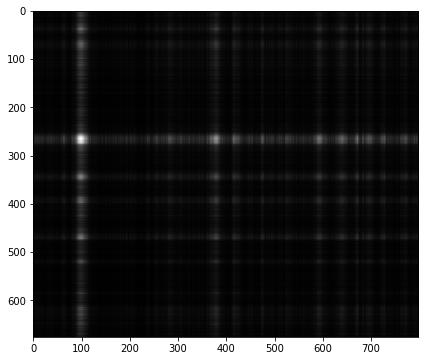

In [43]:
reconstimg = np.matrix(u[:, :1]) * np.diag(s[:1]) * np.matrix(v[:1, :])
plt.figure(figsize=(9,6))
plt.imshow(reconstimg, cmap='gray');

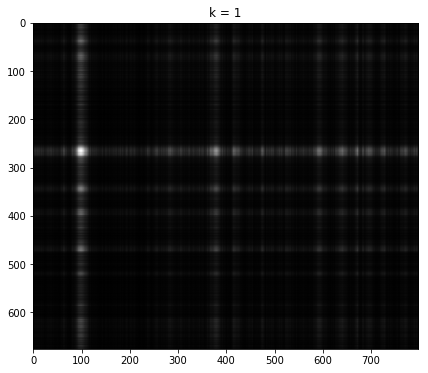

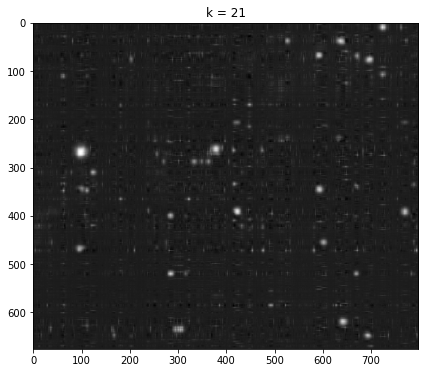

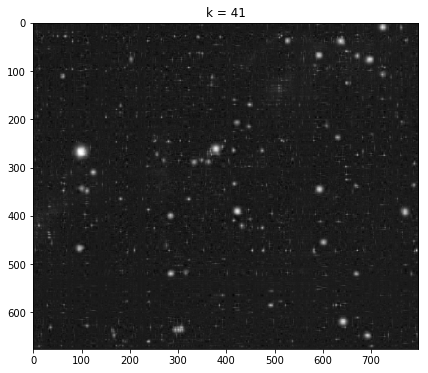

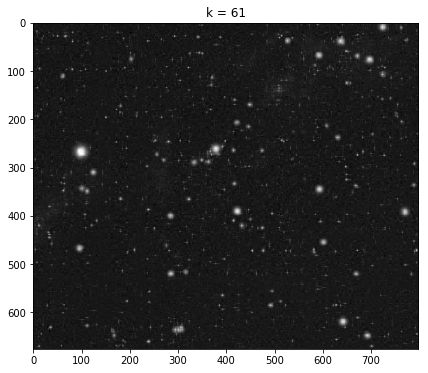

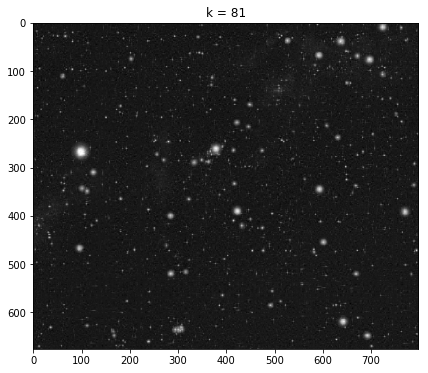

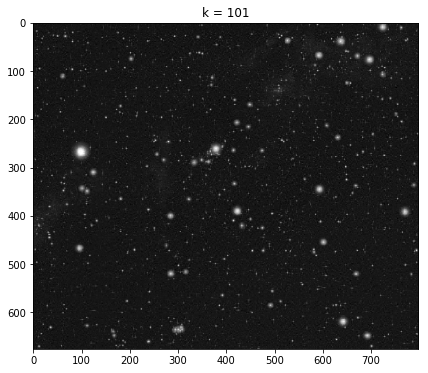

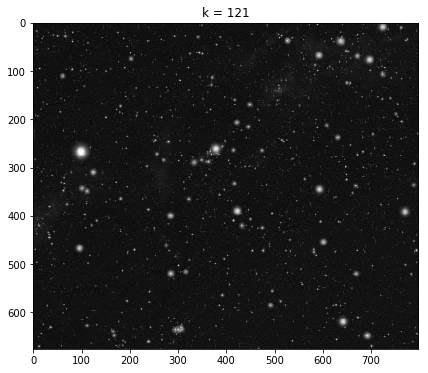

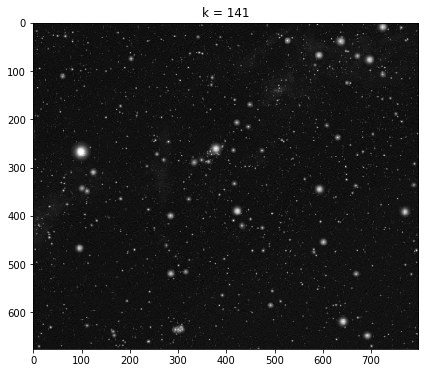

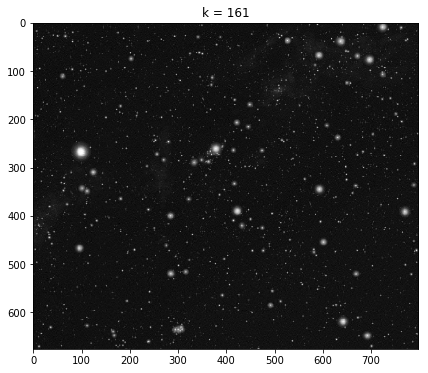

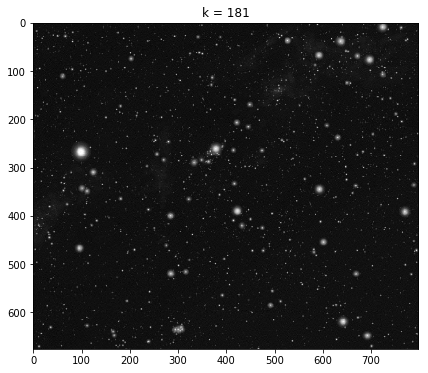

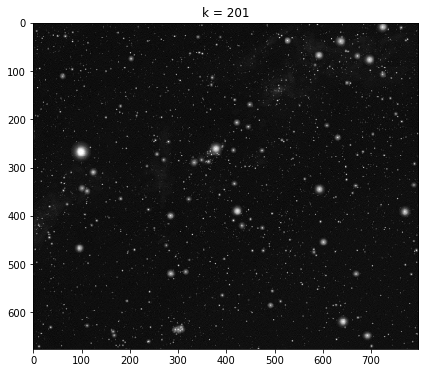

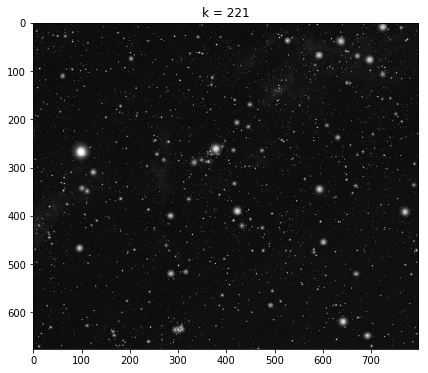

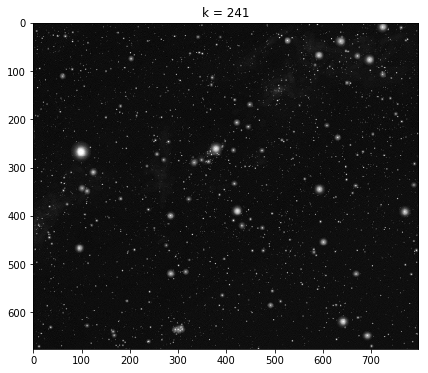

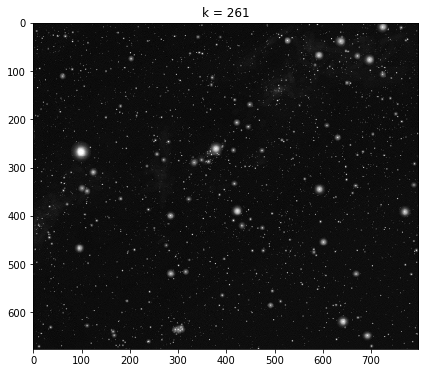

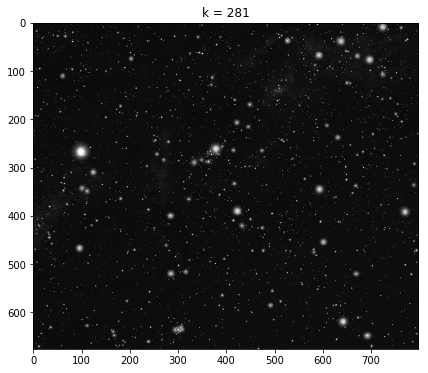

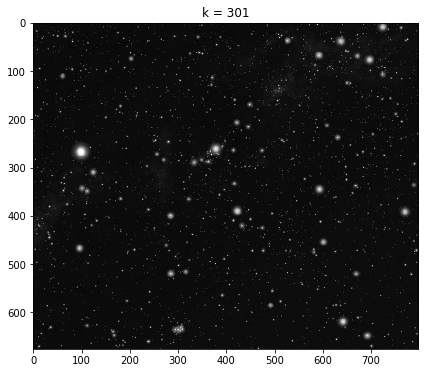

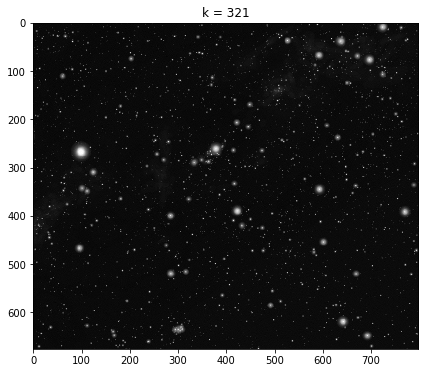

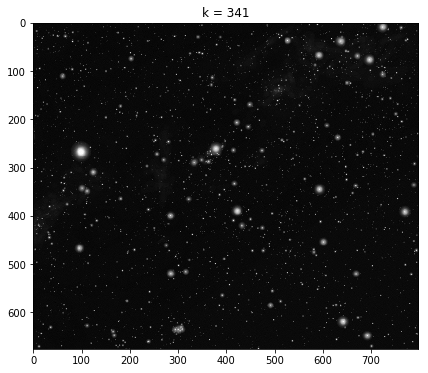

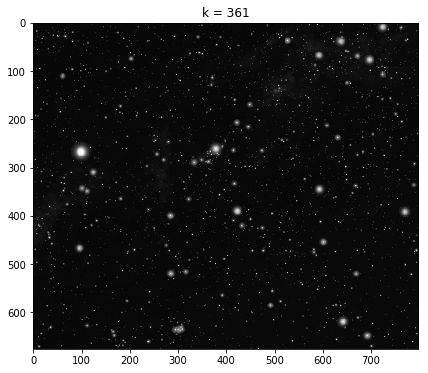

In [51]:
for i in range(1, 380, 20):
    reconstimg = np.matrix(u[:, :i]) * np.diag(s[:i]) * np.matrix(v[:i, :])
    plt.figure(figsize=(9,6))
    plt.imshow(reconstimg, cmap='gray')
    title = "k = %s" % i
    plt.title(title)
    plt.show()